# Imports

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter


# Get song genere data

In [22]:
# Read CSV File
tracks_info_df = pd.read_csv('data.csv')

# Read Processed song data

In [23]:
results_file = 'audio_features_backup.pkl'

if os.path.exists(results_file):
    with open(results_file, 'rb') as file:
        saved_data = pickle.load(file)
    X = saved_data.get('X', [])
    y_labels = saved_data.get('y_labels', [])
    processed_files = set(saved_data.get('processed_files', []))
    print(f"Loaded {len(processed_files)} processed tracks")

Loaded 11840 processed tracks


# Preprocess

In [24]:
# --- Turn X into an np array ---
X = np.array(X)
print("shape of feature matrix X: ", X.shape)

shape of feature matrix X:  (11840, 55)


In [25]:

# --- Replacing Sub-genres with the genres ---
genre_mapping = {
    'lo-fi beats': 'lo-fi',
    'chillwave': 'lo-fi',

    'nu metal': 'metal',
    'folk metal': 'metal',
    'heavy metal': 'metal',
    'metalcore': 'metal',
    'power metal': 'metal',
    'industrial metal': 'metal',
    'glam metal': 'metal',
    'melodic death metal': 'metal',
    'progressive metal': 'metal',
    'thrash metal': 'metal',
    'gothic metal': 'metal',
    'groove metal': 'metal',
    'death metal': 'metal',
    'alternative metal': 'metal',
    'black metal': 'metal',
    'speed metal': 'metal',

    'acid house': 'acid',
    'acid techno': 'acid',

    'afrobeat': 'afro',
    'afropop': 'afro',

    'art rock': 'rock',

    'britpop': 'alternative rock',
    
    'art pop': 'pop',
    'acoustic pop': 'pop',
    'bedroom pop': 'pop',
    'soft pop': 'pop', 
    'folk pop': 'pop',
    'norwegian pop': 'pop',
    'acoustic pop': 'pop',
    'dream pop': 'pop',
    'chamber pop': 'pop',
    'german pop': 'pop',
    'bedroom pop': 'pop',
    'city pop': 'pop',
    'dance pop': 'pop',
    'art pop': 'pop',
    'indie pop': 'pop',

    'alt country': 'country',
    'traditional country': 'country',

    'blues rock': 'blues',

    'brooklyn drill': 'drill',

    'gangster rap': 'rap',
    'memphis rap': 'rap',
    'rock rap': 'rap',
    'meme rap': 'rap',
    'punk rap': 'rap',
    'emo rap': 'rap',
    'jazz rap': 'rap',
    'melodic rap': 'rap',
    'cloud rap': 'rap',
    'k-rap': 'rap',
    'rage rap': 'rap',

    'edm trap': 'trap',
    'italian trap': 'trap',
    'dark trap': 'trap',

    'southern hip hop': 'hip hop',
    'west coast hip hop': 'hip hop',
    'east coast hip hop': 'hip hop',
    'finnish hip hop': 'hip hop',
    'german hip hop': 'hip hop',
    'underground hip hop': 'hip hop',
    'norwegian hip hop': 'hip hop',
    'experimental hip hop': 'hip hop',
    'alternative hip hop': 'hip hop',
    'latin hip hop': 'hip hop',

    'jazz blues': 'jazz',
    'vocal jazz': 'jazz',
    'french jazz': 'jazz',
    'free jazz': 'jazz',
    'soul jazz': 'jazz',
    'jazz fusion': 'jazz',
    'nu jazz': 'jazz',
    'jazz funk': 'jazz',
    'cool jazz': 'jazz',
    'jazz beats': 'jazz',
    'jazz house': 'jazz',
    'indie jazz': 'jazz',
    'smooth jazz': 'jazz',

    'melodic techno': 'techno',
    'minimal techno': 'techno',
    'hypertechno': 'techno',
    'hard techno': 'techno',
    'hardcore techno': 'techno',
    'dub techno': 'techno',

    'future house': 'house',
    'tech house': 'house',
    'bass house': 'house',
    'electro house': 'house',
    'tropical house': 'house',
    'french house': 'house',
    'melodic house': 'house',
    'organic house': 'house',
    'progressive house': 'house',
    'latin house': 'house',
    'deep house': 'house',
    'slap house': 'house',
    'chicago house': 'house'
    
} 

# remove: adult standards, americana?, anime?, baroque pop, bebop, big band, big beat, big room, bluegrass
# boom bap, bossa nova brazilian bass breakbeat breakcore 'calypso' 'canzone napoletana'
# 'celtic rock' 'chamber pop' 'chicha' "children's music"

y_labels_normalized = [genre_mapping.get(label, label) for label in y_labels]



In [26]:
# Magic trick

genre_mapping = {
    'hip hop': 'rap'
} 

y_labels_normalized = [genre_mapping.get(label, label) for label in y_labels_normalized]

In [64]:
# If above is not run
y_labels_normalized = y_labels


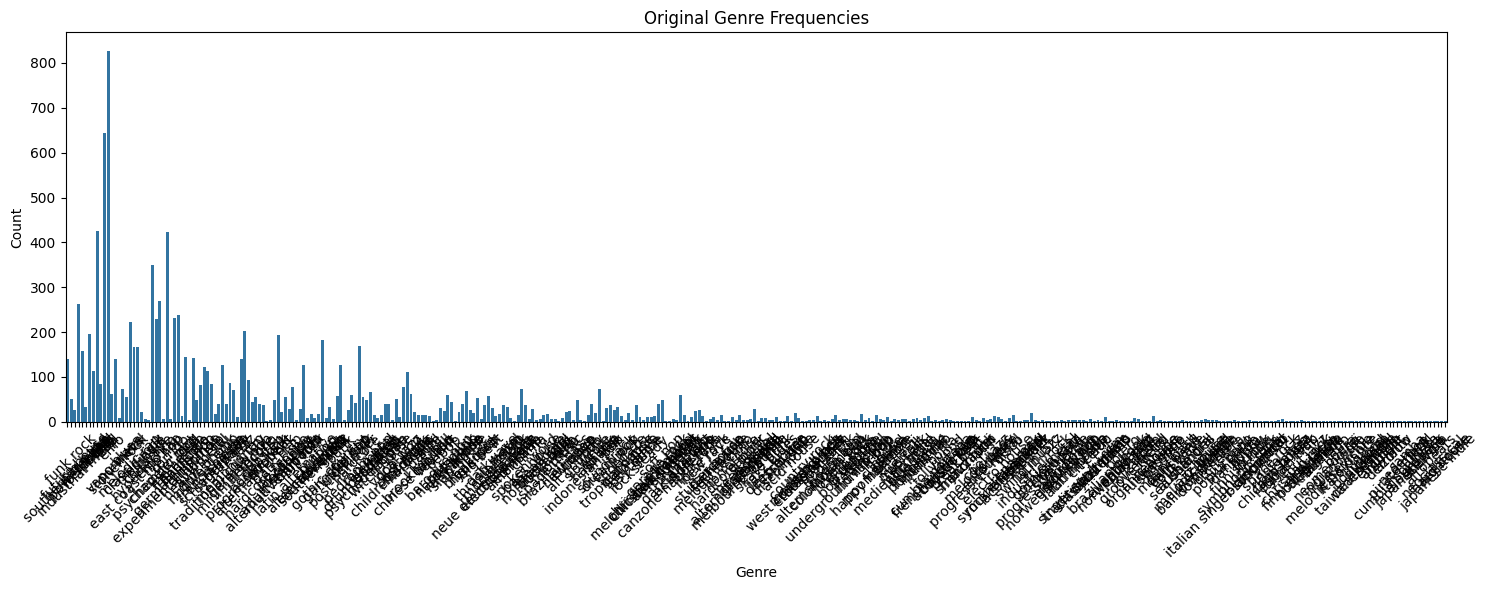

In [27]:
# --- Encoding the Genre Labels ---
#le = LabelEncoder()
#y = le.fit_transform(y_labels_normalized)
#print("Shape of label array y: ", y.shape)

y = y_labels_normalized


# -- Count and show the genres ---
freq_original = Counter(y_labels)

orig_genres = list(freq_original.keys())
orig_counts = list(freq_original.values())

fig, axs = plt.subplots(figsize=(15, 6))

sns.barplot(x=orig_genres, y=orig_counts, ax=axs)
axs.set_title("Original Genre Frequencies")
axs.set_xlabel("Genre")
axs.set_ylabel("Count")
axs.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Remove all songs with genres which do not come up more than n times

Class counts: Counter({'rap': 2977, 'lo-fi': 843, 'metal': 706, 'pop': 521, 'phonk': 426, 'jazz': 382, 'indie': 349, 'house': 250, 'trap': 230, 'psychedelic rock': 229, 'techno': 202, 'folk punk': 183, 'classic rock': 166, 'country': 166, 'flamenco': 145, 'christmas': 142, 'rock': 141, 'vaporwave': 139, 'synthwave': 127, 'punk': 127, 'midwest emo': 123, 'drift phonk': 114, 'hardstyle': 110, 'progressive rock': 94, 'ska': 84, 'post-punk': 78, 'g-funk': 74, 'alternative rock': 73, 'djent': 72, 'edm': 71, 'blues': 70, 'anime': 69, 'rap metal': 67, 'emo': 61, 'hardcore': 61, 'surf rock': 59, 'drum and bass': 56, 'folk rock': 54, 'funk rock': 50, 'psychedelic pop': 49, 'nerdcore': 45, 'pop punk': 44, 'schlager': 42, 'honky tonk': 39, 'reggae': 39, 'garage rock': 39, 'dubstep': 38, 'neue deutsche welle': 38, 'spoken word': 38, 'psytrance': 38, 'gothic country': 33, 'big band': 32, 'baroque pop': 31, 'darkwave': 31, 'soundtrack': 31, 'deathcore': 28, 'big room': 28, 'motown': 28, 'breakcore':

/tmp/ipykernel_3269099/2974962727.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(le.classes_)


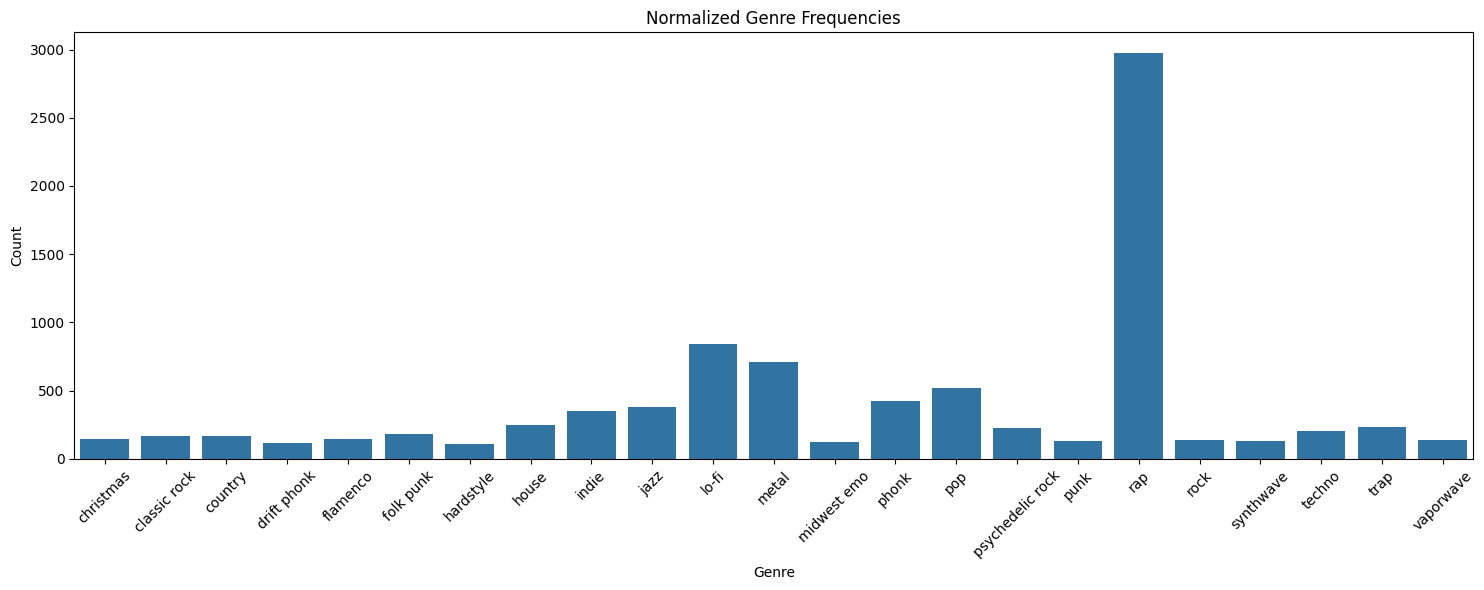

In [28]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# --- Encoding/Standardizing X ---
# Remove compex object variables
if np.iscomplexobj(X):
    X = np.abs(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# --- Counting Labels ---
# Check class counts.
counter = Counter(y)
print("Class counts:", counter)

# Keep only classes with at least n samples. At least 2  or any other % 2 == 0 number
n = 100
classes_to_keep = {cls for cls, count in counter.items() if count >= n}
indices_to_keep = [i for i, label in enumerate(y) if label in classes_to_keep]

y = np.array(y)

# Filter your data.
X_filtered = X_scaled[indices_to_keep]
y_filtered = y[indices_to_keep]

le = LabelEncoder()
y_encoded = le.fit_transform(y_filtered)

freq_leftover = Counter(y_encoded)
leftover_genres = list(freq_leftover.keys())
leftover_counts = list(freq_leftover.values())

fig, axs = plt.subplots(figsize=(15, 6))

# Plot normalized label frequencies.
sns.barplot(x=leftover_genres, y=leftover_counts, ax=axs)
axs.set_title("Normalized Genre Frequencies")
axs.set_xlabel("Genre")
axs.set_ylabel("Count")
axs.tick_params(axis='x', rotation=45)
axs.set_xticklabels(le.classes_)

plt.tight_layout()
plt.show()


# Remove highly collerating data

Dropping columns: ['feature_5', 'feature_8', 'feature_9', 'feature_10', 'feature_12', 'feature_14', 'feature_16', 'feature_20', 'feature_21', 'feature_23', 'feature_26', 'feature_28', 'feature_30', 'feature_31', 'feature_32', 'feature_34', 'feature_37', 'feature_41', 'feature_43', 'feature_44', 'feature_48', 'feature_50', 'feature_51', 'feature_53']


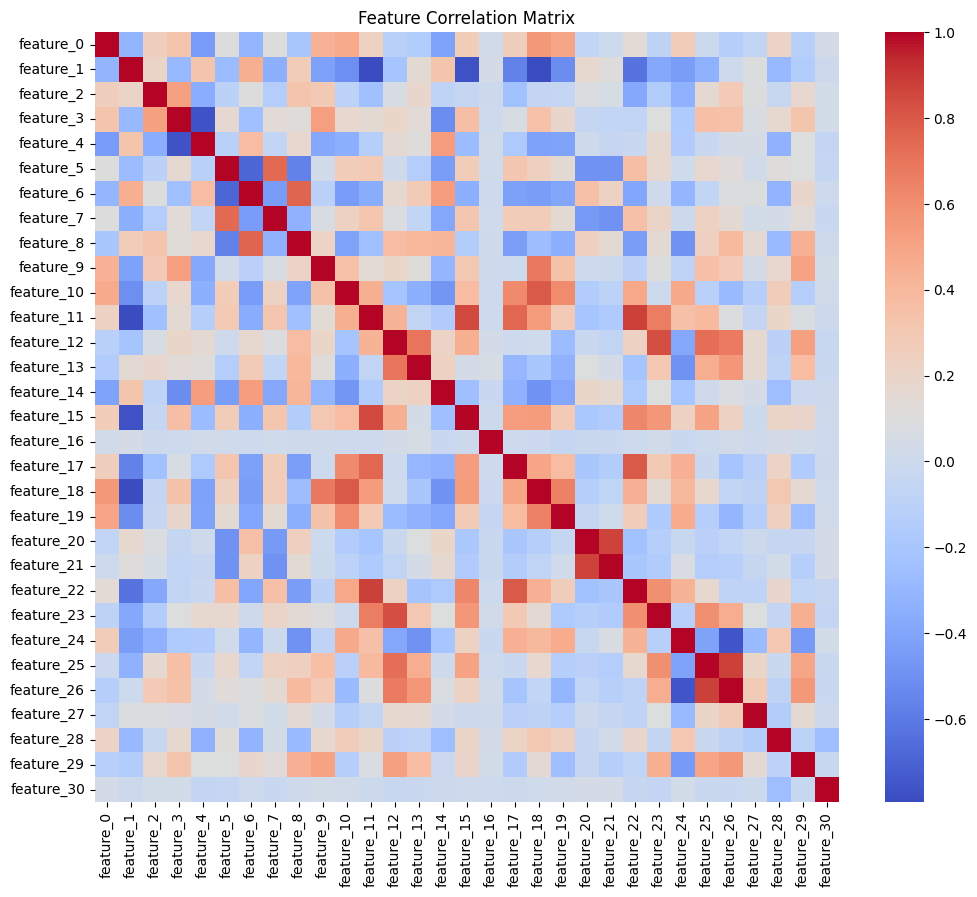

In [29]:
import pandas as pd
import numpy as np

X = X_filtered

def remove_highly_correlated_features(X, threshold=0.9):
    # If X is a NumPy array, convert it to a DataFrame.
    if isinstance(X, np.ndarray):
        # Create column names if not provided
        X_df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
    else:
        X_df = X.copy()
    
    # Compute the absolute correlation matrix
    corr_matrix = X_df.corr().abs()
    
    # Create an upper triangle matrix of correlations
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Identify columns to drop: any feature with correlation greater than the threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print("Dropping columns:", to_drop)
    
    # Drop these columns from the dataframe
    X_df_reduced = X_df.drop(columns=to_drop)
    
    # If original X was a NumPy array, return as a NumPy array.
    if isinstance(X, np.ndarray):
        return X_df_reduced.values
    else:
        return X_df_reduced

X_reduced = remove_highly_correlated_features(X, threshold=0.9)

# -- Create a feature correlation matrix --
df_features = pd.DataFrame(X_reduced, columns=[f'feature_{i}' for i in range(X_reduced.shape[1])])

# Compute the correlation matrix.
corr = df_features.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

X_filtered = X_reduced

# Create a Test-Train split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (7038, 31) (7038,)
Test set shape: (1760, 31) (1760,)


# Hyperparameter tuning

In [ ]:
import numpy as np
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Assuming X_train, X_test, y_train, y_test are already defined
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))

def build_model(hp):
    model = models.Sequential()
    
    # First layer: Let tuner choose activation function and number of units.
    activation_1 = hp.Choice('activation_1', values=['relu', 'tanh', 'sigmoid'])
    units_1 = hp.Int('units_1', min_value=16, max_value=252, step=16)
    model.add(layers.Dense(units_1, activation=activation_1, input_shape=(num_features,),
                           kernel_regularizer=regularizers.l2(0.01)))
    dropout_rate = hp.Float('dropout_rate', 0.0, 0.5, step=0.1)
    model.add(layers.Dropout(dropout_rate))
    
    # Optional second layer: conditionally add if chosen by the tuner
    if hp.Boolean("second_layer"):
        activation_2 = hp.Choice('activation_2', values=['relu', 'tanh', 'sigmoid'])
        units_2 = hp.Int('units_2', min_value=16, max_value=126, step=16)
        model.add(layers.Dense(units_2, activation=activation_2,
                               kernel_regularizer=regularizers.l2(0.01)))
        # Optional dropout after second layer
        dropout_rate_2 = hp.Float('dropout_rate_2', 0.0, 0.5, step=0.1)
        model.add(layers.Dropout(dropout_rate_2))
    
    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    # Hyperparameter for learning rate
    #lr = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=150,
    executions_per_trial=1,
    overwrite=True,
    directory='my_dir',
    project_name='activation_tuning'
)

# EarlyStopping callback to stop training when validation loss doesn't improve
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Start hyperparameter search
tuner.search(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=60,  # Increase epochs for a more robust search if time allows
    callbacks=[early_stop]
)

# Retrieve best hyperparameters and build the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)
print("Best Hyperparameters:")
print(best_hps.values)

# Train the best model further if needed
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,  # Use best trial's epochs or default
    callbacks=[early_stop],
    # optimzer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")



Trial 45 Complete [00h 00m 23s]
val_accuracy: 0.6312500238418579

Best val_accuracy So Far: 0.6704545617103577
Total elapsed time: 00h 17m 37s

Search: Running Trial #46

Value             |Best Value So Far |Hyperparameter
tanh              |relu              |activation_1
160               |240               |units_1
0.3               |0                 |dropout_rate
False             |False             |second_layer
sigmoid           |relu              |activation_2
16                |80                |units_2
0.2               |0.4               |dropout_rate_2

Epoch 1/60
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3889 - loss: 2.7904 - val_accuracy: 0.5545 - val_loss: 1.8731
Epoch 2/60
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5508 - loss: 1.8874 - val_accuracy: 0.5773 - val_loss: 1.6500
Epoch 3/60
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5665 - loss: 1.6913 - val_accuracy: 0.5903 - val_loss: 1.5542
Epoch 4/60
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s

# Evaluation Charts

 1/20 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


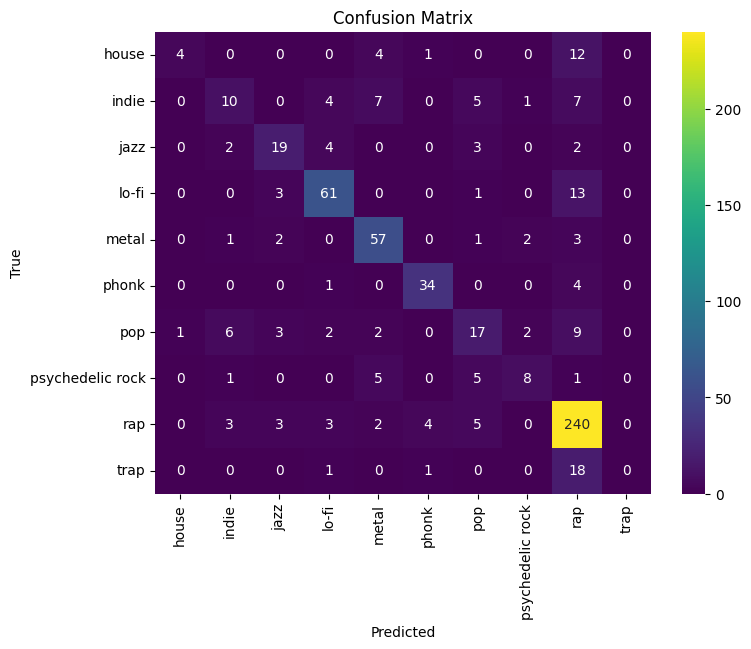

In [55]:
#Confusion Matrix
# Get predictions on the test set.
y_pred = np.argmax(best_model.predict(X_test), axis=1)

decoded_y_test = le.inverse_transform(y_test)
decoded_y_pred = le.inverse_transform(y_pred)

# Create confusion matrix.
cm = confusion_matrix(decoded_y_test, decoded_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

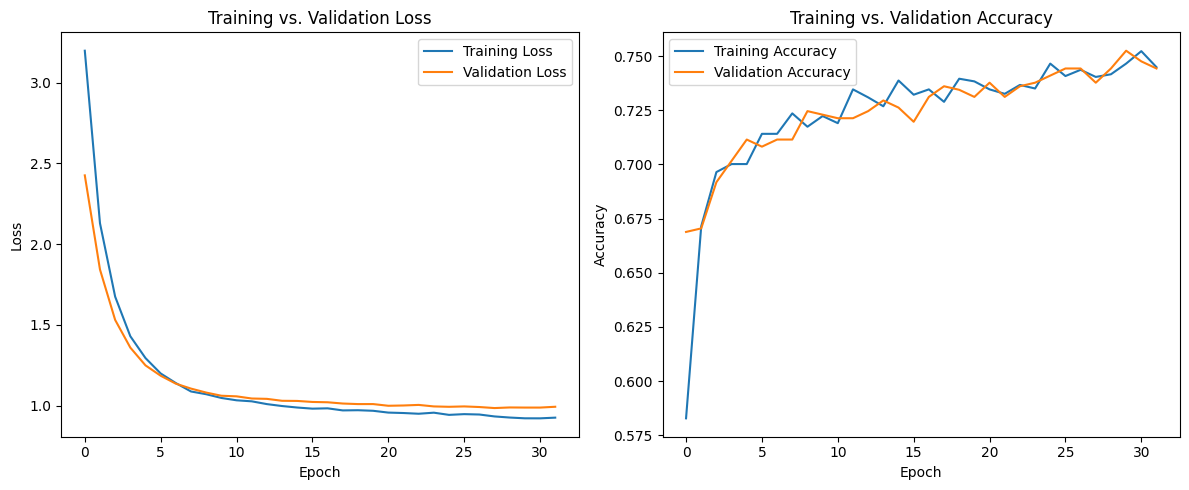

In [56]:
# Plot training vs. validation loss and accuracy.
plt.figure(figsize=(12,5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


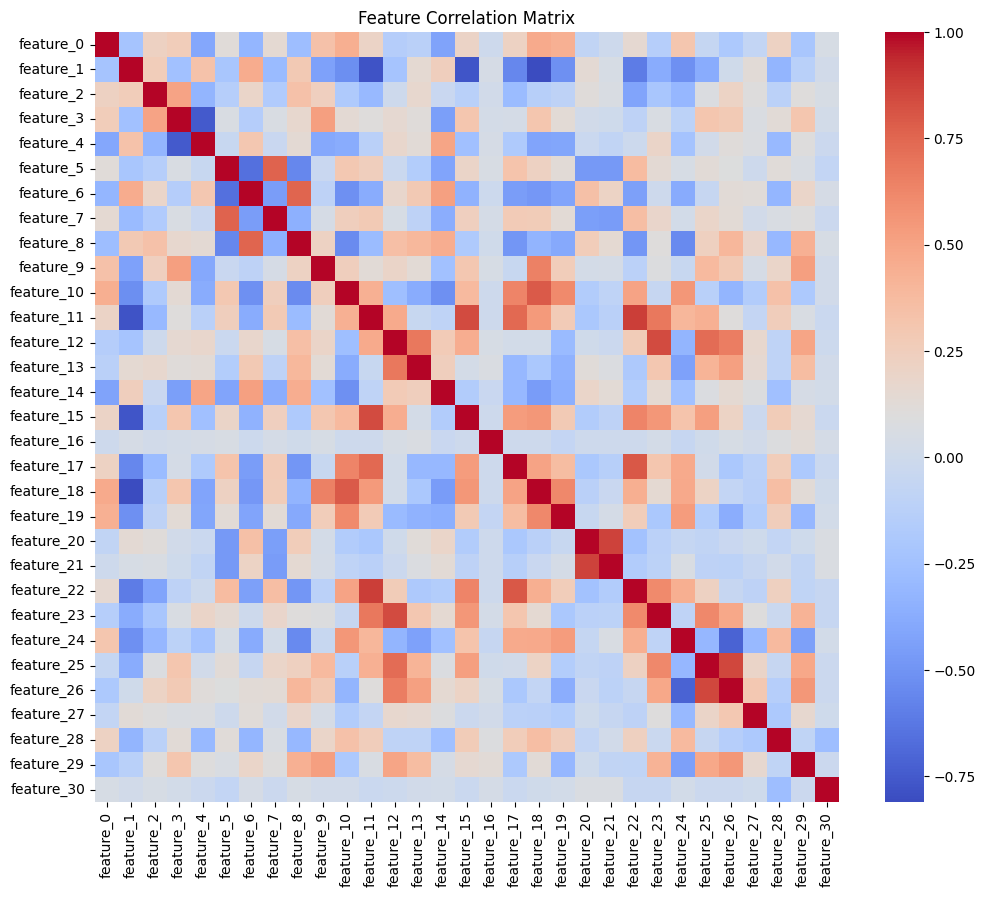

In [58]:
# Create a DataFrame for features. If X has many features, consider selecting a subset.
df_features = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])

# Compute the correlation matrix.
corr = df_features.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

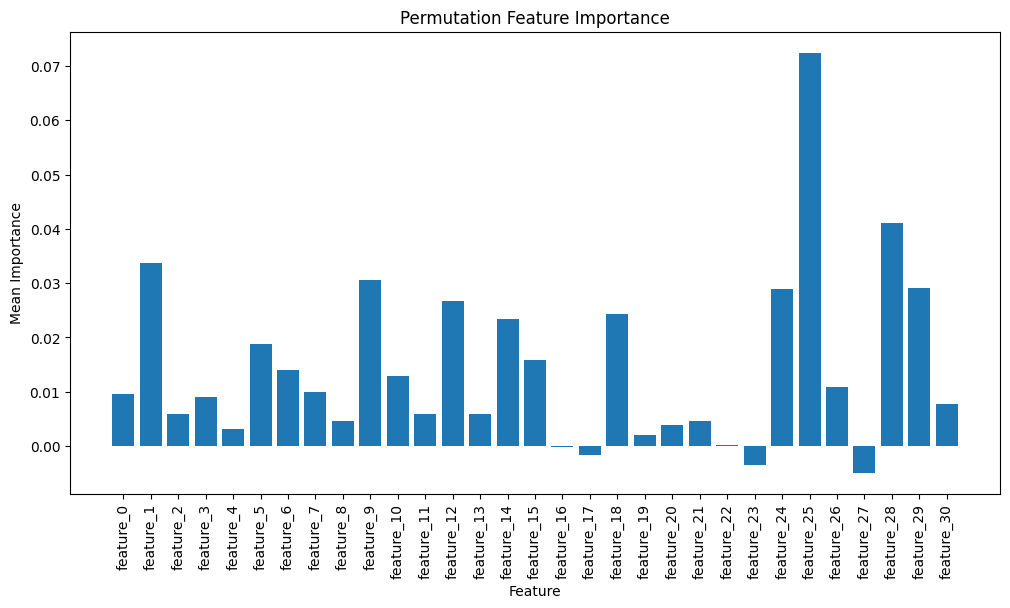

In [60]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.inspection import permutation_importance

# Wrapper for the Keras model to work with sklearn's permutation_importance.
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model
        
    def fit(self, X, y):
        # Model is already trained.
        return self
    
    def predict(self, X):
        preds = self.model.predict(X)
        return np.argmax(preds, axis=1)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

# Wrap our trained model.
wrapper = KerasClassifierWrapper(best_model)

# Compute permutation importance on the test set.
result = permutation_importance(wrapper, X_test, y_test, n_repeats=10,
                                random_state=42, scoring='accuracy')
importance_means = result.importances_mean

# Plot the permutation importance.
plt.figure(figsize=(12, 6))
features = [f'feature_{i}' for i in range(X_filtered.shape[1])]
plt.bar(features, importance_means)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Mean Importance')
plt.title('Permutation Feature Importance')
plt.show()

# Remove unimportant features

In [62]:
import numpy as np
import pandas as pd

# Assume importance_means and importance_threshold are already defined
importance_threshold = 0.01  # adjust this threshold as needed

# Check if X_train is a DataFrame, if not, convert it and assign column names.
if isinstance(X_train, np.ndarray):
    X_train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
else:
    X_train_df = X_train.copy()

# Do the same for X_test.
if isinstance(X_test, np.ndarray):
    X_test_df = pd.DataFrame(X_test, columns=[f'feature_{i}' for i in range(X_test.shape[1])])
else:
    X_test_df = X_test.copy()

# Identify the indices of features with importance greater than or equal to the threshold.
important_feature_indices = np.where(importance_means >= importance_threshold)[0]
print("Important feature indices:", important_feature_indices)

# Retrieve the names of the important features.
important_features = X_train_df.columns[important_feature_indices]
print("Important features:", important_features.tolist())

# Filter the training and test DataFrames to keep only the important features.
X_train_reduced = X_train_df[important_features]
X_test_reduced = X_test_df[important_features]

print("Original training shape:", X_train_df.shape)
print("Reduced training shape:", X_train_reduced.shape)

Important feature indices: [ 1  5  6  7  9 10 12 14 15 18 24 25 26 28 29]
Important features: ['feature_1', 'feature_5', 'feature_6', 'feature_7', 'feature_9', 'feature_10', 'feature_12', 'feature_14', 'feature_15', 'feature_18', 'feature_24', 'feature_25', 'feature_26', 'feature_28', 'feature_29']
Original training shape: (2438, 31)
Reduced training shape: (2438, 15)


# Re-run Hyperparameter search

In [66]:
import numpy as np
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Assuming X_train, X_test, y_train, y_test are already defined
num_features = X_train_reduced.shape[1]
num_classes = len(np.unique(y_train))

def build_model(hp):
    model = models.Sequential()
    
    # First layer: Let tuner choose activation function and number of units.
    activation_1 = hp.Choice('activation_1', values=['relu', 'tanh', 'sigmoid'])
    units_1 = hp.Int('units_1', min_value=16, max_value=256, step=32)
    model.add(layers.Dense(units_1, activation=activation_1, input_shape=(num_features,),
                           kernel_regularizer=regularizers.l2(0.01)))
    dropout_rate = hp.Float('dropout_rate', 0.0, 0.5, step=0.1)
    model.add(layers.Dropout(dropout_rate))
    
    # Optional second layer: conditionally add if chosen by the tuner
    if hp.Boolean("second_layer"):
        activation_2 = hp.Choice('activation_2', values=['relu', 'tanh', 'sigmoid'])
        units_2 = hp.Int('units_2', min_value=16, max_value=256, step=32)
        model.add(layers.Dense(units_2, activation=activation_2,
                               kernel_regularizer=regularizers.l2(0.01)))
        # Optional dropout after second layer
        dropout_rate_2 = hp.Float('dropout_rate_2', 0.0, 0.5, step=0.1)
        model.add(layers.Dropout(dropout_rate_2))
    
    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    # Hyperparameter for learning rate
    #lr = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory='my_dir',
    project_name='activation_tuning'
)

# EarlyStopping callback to stop training when validation loss doesn't improve
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Start hyperparameter search
tuner.search(
    X_train_reduced, y_train,
    validation_data=(X_test_reduced, y_test),
    epochs=60,  # Increase epochs for a more robust search if time allows
    callbacks=[early_stop]
)

# Retrieve best hyperparameters and build the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)
print("Best Hyperparameters:")
print(best_hps.values)

# Train the best model further if needed
history = best_model.fit(
    X_train_reduced, y_train,
    validation_data=(X_test_reduced, y_test),
    epochs=60,  # Use best trial's epochs or default
    callbacks=[early_stop],
    #optimzer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(X_test_reduced, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Trial 10 Complete [00h 00m 14s]
val_accuracy: 0.72295081615448

Best val_accuracy So Far: 0.72295081615448
Total elapsed time: 00h 02m 31s
Best Hyperparameters:
{'activation_1': 'relu', 'units_1': 80, 'dropout_rate': 0.2, 'second_layer': False, 'activation_2': 'sigmoid', 'units_2': 144, 'dropout_rate_2': 0.1}
Epoch 1/60


/home/agres/Services/predictify/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3532 - loss: 2.2458 - val_accuracy: 0.5951 - val_loss: 1.6067
Epoch 2/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6067 - loss: 1.5517 - val_accuracy: 0.6410 - val_loss: 1.4056
Epoch 3/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6520 - loss: 1.3622 - val_accuracy: 0.6590 - val_loss: 1.3124
Epoch 4/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6578 - loss: 1.2756 - val_accuracy: 0.6656 - val_loss: 1.2487
Epoch 5/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6692 - loss: 1.2214 - val_accuracy: 0.6705 - val_loss: 1.2013
Epoch 6/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6738 - loss: 1.1683 - val_accuracy: 0.6787 - val_loss: 1.1650
Epoch 7/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6801 - loss: 1.1302 - val_accuracy: 0.6770 - val_loss: 1.1342
Epoch 8/60
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6869 - loss: 1.0999 - val_accuracy: 0.6820 - val_loss: 1.1118
Epo

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


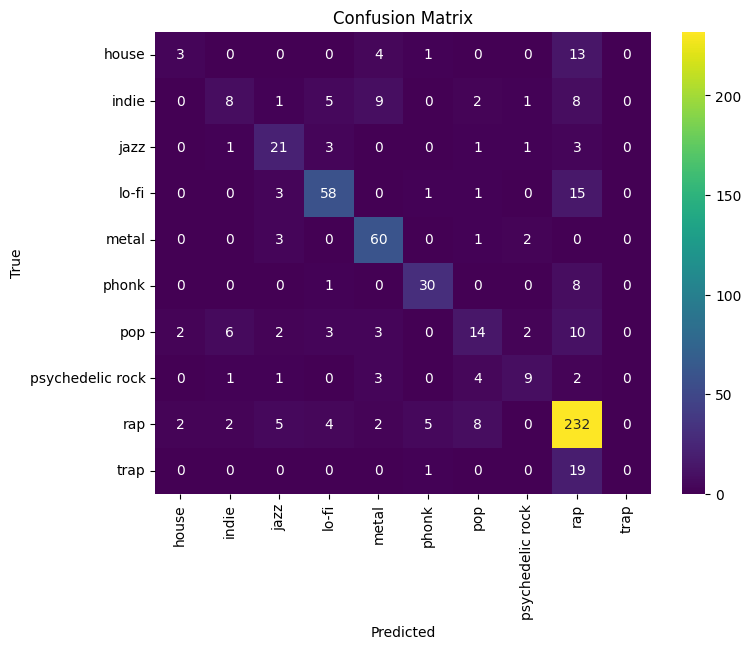

In [67]:
#Confusion Matrix
# Get predictions on the test set.
y_pred = np.argmax(best_model.predict(X_test_reduced), axis=1)

decoded_y_test = le.inverse_transform(y_test)
decoded_y_pred = le.inverse_transform(y_pred)

# Create confusion matrix.
cm = confusion_matrix(decoded_y_test, decoded_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

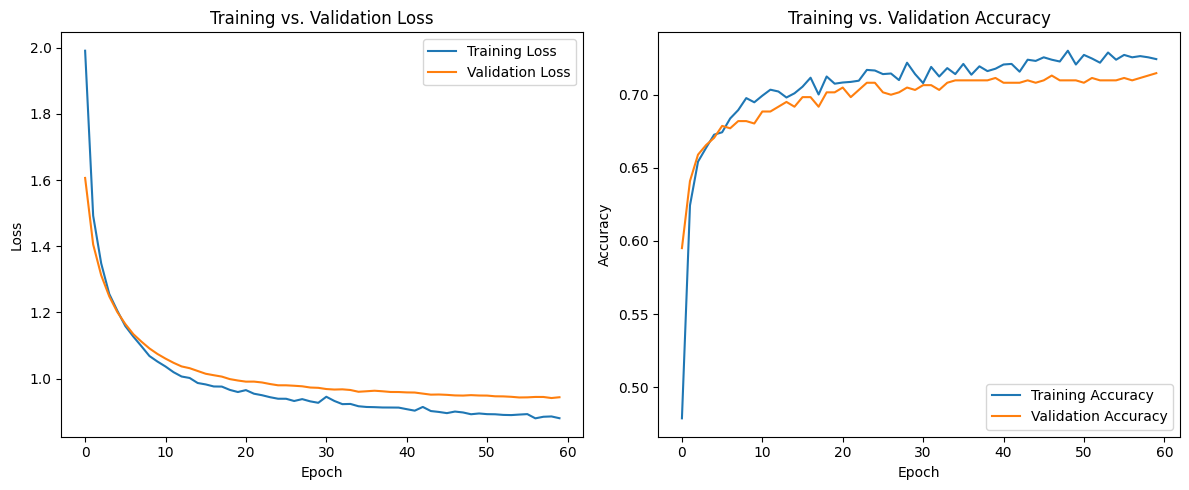

In [68]:
# Plot training vs. validation loss and accuracy.
plt.figure(figsize=(12,5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

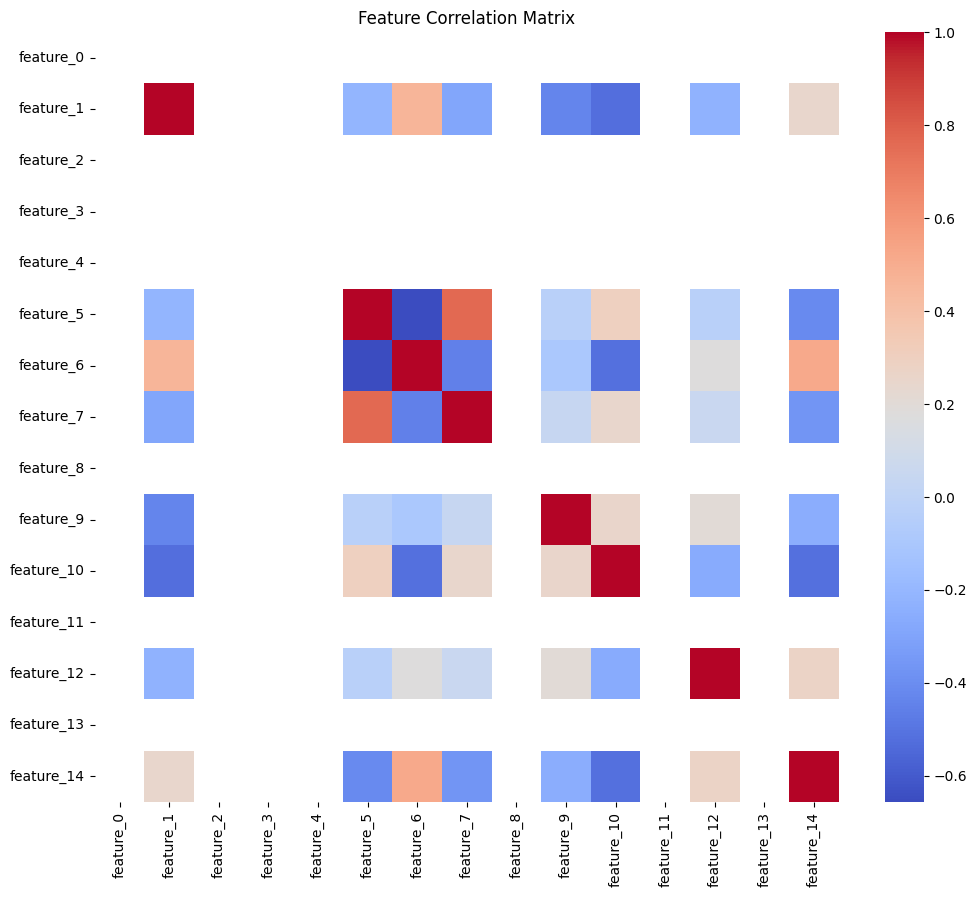

In [69]:
# Create a DataFrame for features. If X has many features, consider selecting a subset.
df_features = pd.DataFrame(X_train_reduced, columns=[f'feature_{i}' for i in range(X_train_reduced.shape[1])])

# Compute the correlation matrix.
corr = df_features.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

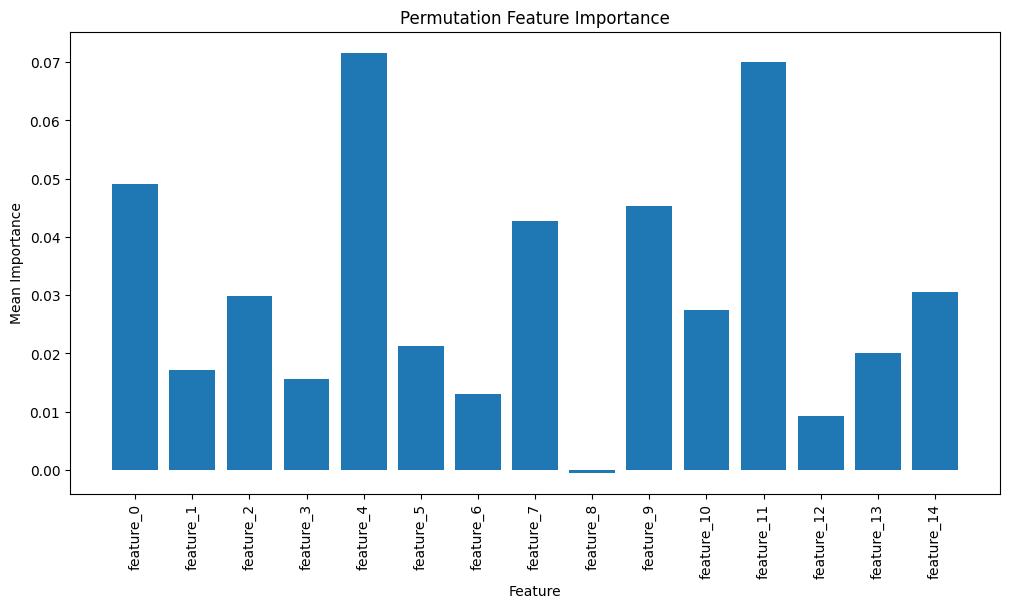

In [70]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.inspection import permutation_importance

# Wrapper for the Keras model to work with sklearn's permutation_importance.
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model
        
    def fit(self, X, y):
        # Model is already trained.
        return self
    
    def predict(self, X):
        preds = self.model.predict(X)
        return np.argmax(preds, axis=1)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

# Wrap our trained model.
wrapper = KerasClassifierWrapper(best_model)

# Compute permutation importance on the test set.
result = permutation_importance(wrapper, X_test_reduced, y_test, n_repeats=10,
                                random_state=42, scoring='accuracy')
importance_means = result.importances_mean

# Plot the permutation importance.
plt.figure(figsize=(12, 6))
features = [f'feature_{i}' for i in range(X_train_reduced.shape[1])]
plt.bar(features, importance_means)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Mean Importance')
plt.title('Permutation Feature Importance')
plt.show()